In [4]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Sklearn as PRS for specific SNPs

In [5]:
df_merged = pd.read_csv('E:\Mathias\with_comorb.csv')

In [6]:
df_afli = pd.read_csv(r'E:/Mathias/phenotypes/afib_all_pheno.txt', delimiter = '\t', header = None)
df_afli.rename(columns={1: 'eid', 2: 'phenotype'}, inplace=True)
df_afli.drop(columns=[0], inplace=True)
df_afli = df_afli.merge(df_merged, on='eid', how='left')
df_afli

,eid,phenotype,Unnamed: 0,Obesity,Obesity_date,Heart_failure,HF_date,diabetess,pillage,contraceptive,warfarin,anysmoker,cancer,age,sex
0,1000017,1,0,1,NaN,1,NaN,1,NaN,1,1,1,1,49.0,1.0
1,1000025,1,1,1,NaN,1,NaN,1,26.0,2,1,1,1,41.0,0.0
2,1000038,1,2,1,NaN,1,NaN,1,NaN,1,1,1,1,62.0,0.0
3,1000042,1,3,1,NaN,1,NaN,1,NaN,1,1,2,1,69.0,1.0
4,1000056,1,4,1,NaN,1,NaN,1,NaN,1,1,1,1,56.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502500,6025014,1,502500,1,NaN,1,NaN,1,NaN,1,1,1,1,64.0,1.0
502501,6025021,1,502501,1,NaN,1,NaN,2,NaN,1,1,2,1,68.0,1.0
502502,6025039,2,502502,1,NaN,1,NaN,1,NaN,1,1,1,1,55.0,1.0
502503,6025043,1,502503,1,NaN,1,NaN,1,NaN,1,1,1,1,60.0,1.0


# Load genetic data

In [10]:
df_genetic = pd.read_csv('E:\Mathias\\afib_train_snps_linear.csv')

In [12]:
df_genetic
df_genetic.rename(columns={'FID': 'eid'}, inplace=True)
df_genetic.drop(columns={'IID', 'Unnamed: 0', 'PAT', 'MAT', 'SEX', 'PHENOTYPE'}, inplace=True)
df_afli = df_afli.merge(df_genetic, on='eid', how='left')
df_afli.drop(columns=['Unnamed: 0', 'Obesity_date', 'HF_date', 'pillage', 'warfarin'], inplace=True)
df_afli['phenotype'] = df_afli['phenotype'].replace([1], 0)
df_afli['phenotype'] = df_afli['phenotype'].replace([2], 1)
df_afli

,eid,phenotype,Obesity,Heart_failure,diabetess,contraceptive,anysmoker,cancer,age,sex,...,rs3729825_T,rs7164883_G,rs11630367_G,rs62053234_T,rs2106261_T,rs879324_A,rs9940321_A,rs61164185_A,rs9930504_T,rs1183967_T
0,1000017,0,1,1,1,1,1,1,49.0,1.0,...,0.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,1000025,0,1,1,1,2,1,1,41.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000038,0,1,1,1,1,1,1,62.0,0.0,...,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1000042,0,1,1,1,1,2,1,69.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1000056,0,1,1,1,1,1,1,56.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502500,6025014,0,1,1,1,1,1,1,64.0,1.0,...,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
502501,6025021,0,1,1,2,1,2,1,68.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502502,6025039,1,1,1,1,1,1,1,55.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
502503,6025043,0,1,1,1,1,1,1,60.0,1.0,...,0.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0


In [13]:
df_qc = pd.read_csv('E:\\Data\\UkBiobank\\ukb_10.fam', sep = " ", header = None)
df_qc['eid'] = df_qc[[0]]
df_qc = df_qc[['eid']]
df_afli = df_afli.merge(df_qc, on='eid', how='right')
df_afli

,eid,phenotype,Obesity,Heart_failure,diabetess,contraceptive,anysmoker,cancer,age,sex,...,rs3729825_T,rs7164883_G,rs11630367_G,rs62053234_T,rs2106261_T,rs879324_A,rs9940321_A,rs61164185_A,rs9930504_T,rs1183967_T
0,1000017,0,1,1,1,1,1,1,49.0,1.0,...,0.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,1000025,0,1,1,1,2,1,1,41.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000038,0,1,1,1,1,1,1,62.0,0.0,...,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1000042,0,1,1,1,1,2,1,69.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1000056,0,1,1,1,1,1,1,56.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446175,6025006,0,1,1,1,1,2,1,58.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
446176,6025014,0,1,1,1,1,1,1,64.0,1.0,...,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
446177,6025039,1,1,1,1,1,1,1,55.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446178,6025043,0,1,1,1,1,1,1,60.0,1.0,...,0.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0


In [14]:
df_afli.drop(['Obesity', 'Heart_failure', 'diabetess', 'contraceptive', 'anysmoker', 'anysmoker', 'cancer',
             'age', 'sex'], axis = 1, inplace = True)
df_afli

,eid,phenotype,rs1218598_G,rs1218547_A,rs6666258_C,rs13376333_T,rs6658392_C,rs2335407_T,rs41264253_A,rs2061690_T,...,rs3729825_T,rs7164883_G,rs11630367_G,rs62053234_T,rs2106261_T,rs879324_A,rs9940321_A,rs61164185_A,rs9930504_T,rs1183967_T
0,1000017,0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,1000025,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000038,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1000042,0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1000056,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446175,6025006,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
446176,6025014,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
446177,6025039,1,1.0,1.0,2.0,2.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446178,6025043,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0


# Split into train/test from EIR

Get in train and test sets for afib and merge with above cohort

In [15]:
df_test = pd.read_csv(r'E:\Mathias\phenotypes\test_ids_afib_v2.txt', header=None)
df_train = pd.read_csv(r'E:\Mathias\phenotypes\training_ids_afib_v2.txt', header=None)

In [16]:
df_test['eid'] = df_test[[0]]
df_train['eid'] = df_train[[0]]
df_test = df_test[['eid']]
df_train = df_train[['eid']]
df_afli_train = df_afli.merge(df_train, on='eid', how='right')
df_afli_test = df_afli.merge(df_test, on='eid', how='right')
df_afli_test

,eid,phenotype,rs1218598_G,rs1218547_A,rs6666258_C,rs13376333_T,rs6658392_C,rs2335407_T,rs41264253_A,rs2061690_T,...,rs3729825_T,rs7164883_G,rs11630367_G,rs62053234_T,rs2106261_T,rs879324_A,rs9940321_A,rs61164185_A,rs9930504_T,rs1183967_T
0,1000634,0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001312,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1001398,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1001431,0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1001632,0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28834,6024475,0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28835,6024517,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
28836,6024525,0,1.0,1.0,2.0,2.0,2.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28837,6024668,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


# Logistic regression

In [17]:
#Eliminate NaN
df_afli_train.fillna(method = 'ffill', inplace = True)

#split dataset in features and target variable
feature_cols_train = df_afli_train.iloc[:, 2:289]
target_cols_train = df_afli_train['phenotype']
X_train = feature_cols_train # Features
y_train = target_cols_train # Target variable

#Eliminate NaN
df_afli_test.fillna(method = 'ffill', inplace = True)

#split dataset in features and target variable
feature_cols_test = df_afli_test.iloc[:, 2:289]
target_cols_test = df_afli_test['phenotype']
X_test = feature_cols_test # Features
y_test = target_cols_test # Target variable

In [18]:
X_train

,rs1218598_G,rs1218547_A,rs6666258_C,rs13376333_T,rs6658392_C,rs2335407_T,rs41264253_A,rs2061690_T,rs61811895_T,rs60674412_T,...,rs3729825_T,rs7164883_G,rs11630367_G,rs62053234_T,rs2106261_T,rs879324_A,rs9940321_A,rs61164185_A,rs9930504_T,rs1183967_T
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417336,1.0,2.0,2.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
417337,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
417338,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0
417339,0.0,0.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [19]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=16)


In [20]:
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16, max_iter=1000, solver='liblinear', penalty='l1')

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [21]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[27050,     0],
       [ 1789,     0]], dtype=int64)

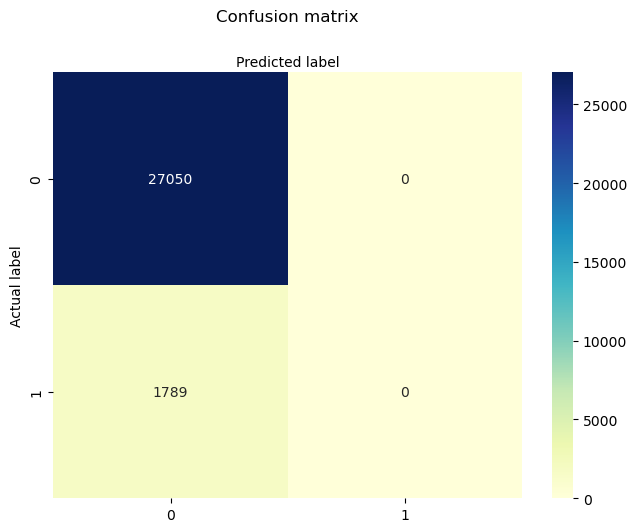

In [22]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show(1)

In [23]:
from sklearn.metrics import classification_report
target_names = ['without afli', 'with afli']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

without afli       0.94      1.00      0.97     27050
   with afli       0.00      0.00      0.00      1789

    accuracy                           0.94     28839
   macro avg       0.47      0.50      0.48     28839
weighted avg       0.88      0.94      0.91     28839



C:\Users\Mathias\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mathias\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mathias\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


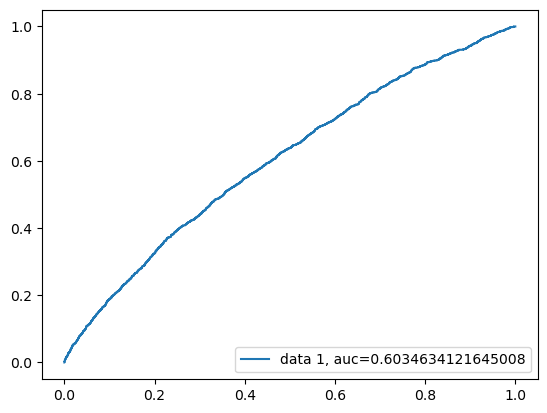

In [24]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Feature importance 

In [25]:
feature_weights = logreg.coef_[0]

In [26]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_weights})

In [27]:
feature_importance = feature_importance.reindex(feature_importance.Importance.abs().sort_values(ascending=False).index)

In [28]:
print(feature_importance)

              Feature  Importance
44       rs17042171_A    0.282965
34       rs16866465_G   -0.240740
45       rs10033464_T    0.218606
64       rs11773845_C   -0.217180
16        rs1009358_C   -0.206248
..                ...         ...
71  rs145031720_TTATC   -0.002192
0         rs1218598_G    0.002108
18        rs2249105_G    0.001934
88        rs1895585_A    0.001366
26        rs2857265_A    0.000059

[100 rows x 2 columns]


In [29]:
feature_importance.head(20)

,Feature,Importance
44,rs17042171_A,0.282965
34,rs16866465_G,-0.240740
45,rs10033464_T,0.218606
64,rs11773845_C,-0.217180
16,rs1009358_C,-0.206248
28,rs3731748_A,0.182317
17,rs2723065_G,0.160737
33,rs13390491_T,0.157113
48,rs13124249_A,0.150273
66,rs7832861_A,0.143777


In [30]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.181403
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              phenotype   No. Observations:               417341
Model:                          Logit   Df Residuals:                   417241
Method:                           MLE   Df Model:                           99
Date:                Mon, 25 Mar 2024   Pseudo R-squ.:                -0.01575
Time:                        21:30:14   Log-Likelihood:                -75707.
converged:                       True   LL-Null:                       -74533.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
rs1218598_G          -0.0415      0.014     -2.895      0.004      -0.070      -0.013
rs121854

# Results, written

# Bootstrapping

In [31]:
from sklearn.utils import resample

In [32]:
model = LogisticRegression(random_state=16, max_iter=1000, solver='liblinear', penalty='l1')
model.fit(X_train, y_train)
original_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

In [33]:
n_iterations = 100
roc_aucs = []

In [34]:
for i in range(n_iterations):
    X_resampled, y_resampled = resample(X_train, y_train)
    
    model.fit(X_resampled, y_resampled)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    roc_aucs.append(auc)
    
lower = np.percentile(roc_aucs, 2.5)
upper = np.percentile(roc_aucs, 97.5)

print(f"Original ROC-AUC: {original_auc:.3f}")
print(f"95% Confidence Interval for ROC-AUC: ({lower:.3f}, {upper:.3f})")

Original ROC-AUC: 0.603
95% Confidence Interval for ROC-AUC: (0.600, 0.604)


In [35]:
original_auc

0.6034634121645008